In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
Housing = pd.read_csv("BostonHousing.csv")
Housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
X = Housing[["lstat", "rm"]]
Y = Housing["medv"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

(     lstat     rm
 33   18.35  5.701
 283   3.16  7.923
 418  20.62  5.957
 502   9.08  6.120
 402  20.31  6.404
 ..     ...    ...
 486  14.98  6.114
 189   5.39  7.185
 495  17.60  5.670
 206  10.97  6.326
 355   5.57  5.936
 
 [404 rows x 2 columns],
 33     13.1
 283    50.0
 418     8.8
 502    20.6
 402    12.1
        ... 
 486    19.1
 189    34.9
 495    23.1
 206    24.4
 355    20.6
 Name: medv, Length: 404, dtype: float64)

In [8]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [12]:
Y_Test_Predict = LR.predict(x_test)
Root_Mean_Sqaure = (np.sqrt(mean_squared_error(y_test, Y_Test_Predict)))
Root_Mean_Sqaure

5.13740078470291

In [22]:
# PolyNormialRegression
PolyFeature = PolynomialFeatures(degree = 2)
xtrainpoly = PolyFeature.fit_transform(x_train)
polymodel = LinearRegression()
polymodel.fit(xtrainpoly, y_train)
xtestpoly = PolyFeature.fit_transform(x_test)
ytestpredictpoly = polymodel.predict(xtestpoly)
rootmeansquareerrorpolymodel = (np.sqrt(mean_squared_error(y_test, ytestpredictpoly)))
print(rootmeansquareerrorpolymodel)

3.784819884545041


Text(0.5, 0, 'RM')

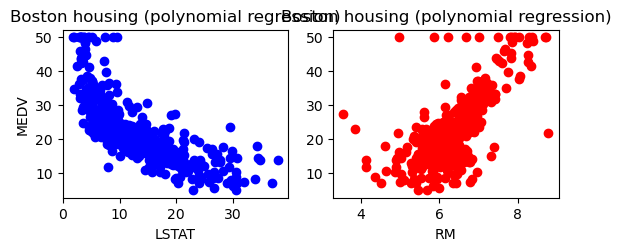

In [23]:
#graphical part
lstat = Housing['lstat']
medv = Housing['medv']
rm = Housing['rm']

plt.subplot(221)
plt.scatter(x=lstat,y=medv,color='blue',marker='o')
plt.title("Boston housing (polynomial regression)")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")


plt.subplot(222)
plt.scatter(x=rm,y=medv,color='red',marker='o')
plt.title("Boston housing (polynomial regression)")
plt.xlabel("RM")